In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Load first 3 months
df_jan = pd.read_csv("../data/raw/311/311_data_2023-01-01_to_2023-01-31.csv")
df_feb = pd.read_csv("../data/raw/311/311_data_2023-01-31_to_2023-03-02.csv")
df_mar = pd.read_csv("../data/raw/311/311_data_2023-03-02_to_2023-04-01.csv")
df = pd.concat([df_jan, df_feb, df_mar], ignore_index=True)

print(f"Loaded {len(df):,} records")
df.head()

Loaded 741,909 records


,unique_key,created_date,closed_date,agency,complaint_type,descriptor,status,borough,latitude,longitude
0,56416396,2023-01-01T00:00:00.000,2023-01-03T14:56:48.000,DOHMH,Food Poisoning,1 or 2,Closed,QUEENS,40.727630,-73.873614
1,56417527,2023-01-01T00:00:09.000,2023-01-01T00:36:06.000,NYPD,Illegal Fireworks,NaN,Closed,BROOKLYN,40.640915,-73.973642
2,56416252,2023-01-01T00:00:42.000,2023-01-01T17:34:15.000,NYPD,Noise - Residential,Loud Music/Party,Closed,BRONX,40.853848,-73.917709
3,56418795,2023-01-01T00:00:45.000,2023-01-01T01:24:10.000,NYPD,Illegal Parking,Posted Parking Sign Violation,Closed,MANHATTAN,40.754875,-74.000747
4,56418136,2023-01-01T00:00:46.000,2023-01-01T01:01:43.000,NYPD,Noise - Residential,Loud Music/Party,Closed,BROOKLYN,40.620665,-73.926040


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741909 entries, 0 to 741908
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   unique_key      741909 non-null  int64  
 1   created_date    741909 non-null  object 
 2   closed_date     734761 non-null  object 
 3   agency          741909 non-null  object 
 4   complaint_type  741909 non-null  object 
 5   descriptor      729420 non-null  object 
 6   status          741909 non-null  object 
 7   borough         741909 non-null  object 
 8   latitude        728915 non-null  float64
 9   longitude       728915 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 56.6+ MB


In [41]:
print(df.isnull().sum())
print(f"\nMissing %:")
print((df.isnull().sum() / len(df) * 100).round(2))


unique_key            0
created_date          0
closed_date        7148
agency                0
complaint_type        0
descriptor        12489
status                0
borough               0
latitude          12994
longitude         12994
day_of_week           0
dtype: int64

Missing %:
unique_key        0.00
created_date      0.00
closed_date       0.96
agency            0.00
complaint_type    0.00
descriptor        1.68
status            0.00
borough           0.00
latitude          1.75
longitude         1.75
day_of_week       0.00
dtype: float64


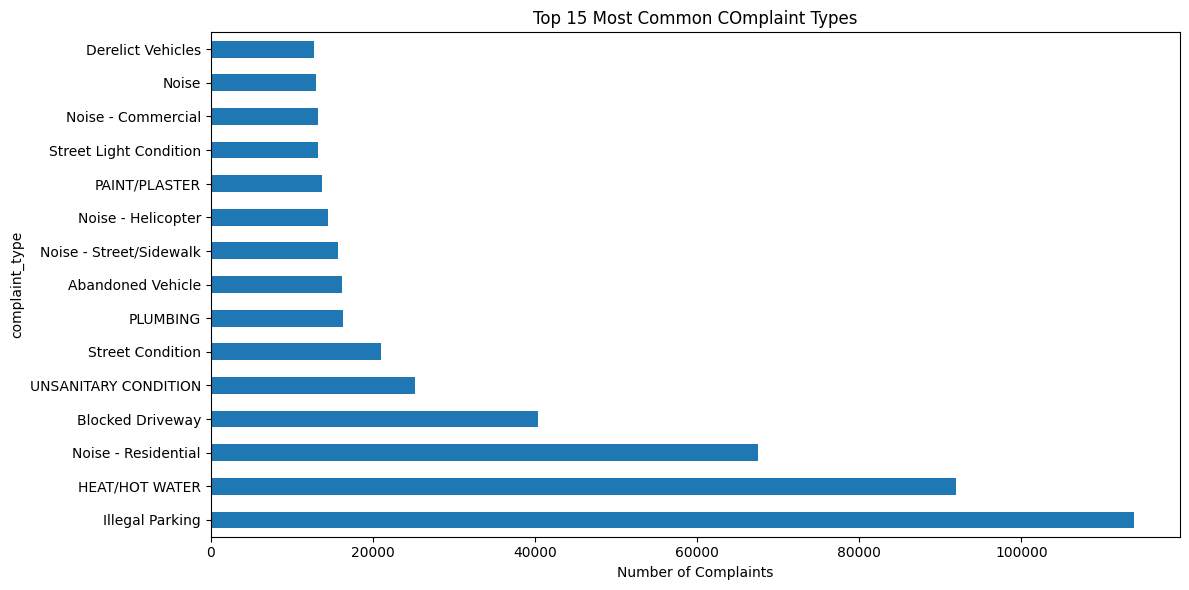

In [36]:
plt.figure(figsize=(12,6))
top_complaints = df["complaint_type"].value_counts().head(15)
top_complaints.plot(kind="barh")
plt.title("Top 15 Most Common COmplaint Types")
plt.xlabel("Number of Complaints")
plt.tight_layout()
plt.show()

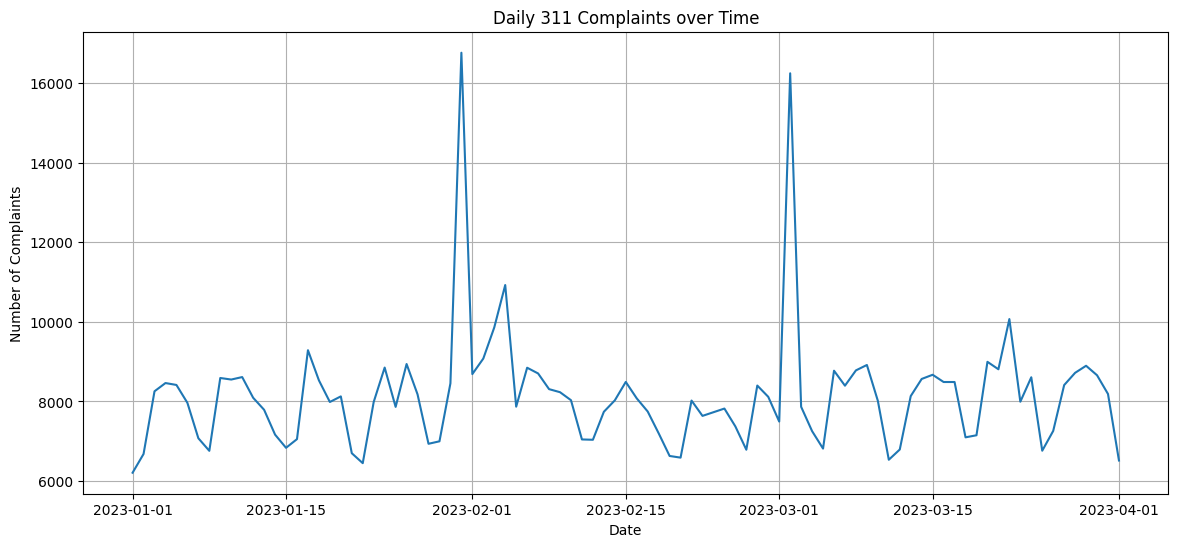

In [37]:
df['created_date'] = pd.to_datetime(df['created_date'])
daily_complaints = df.groupby(df['created_date'].dt.date).size()

plt.figure(figsize=(14, 6))
daily_complaints.plot()
plt.title('Daily 311 Complaints over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.grid()
plt.show()


borough
BROOKLYN         229513
QUEENS           171211
BRONX            155887
MANHATTAN        152861
STATEN ISLAND     31301
Unspecified        1136
Name: count, dtype: int64


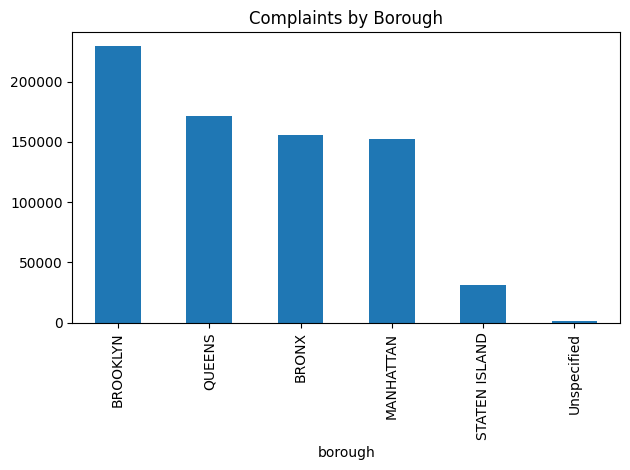

In [38]:
borough_counts = df['borough'].value_counts()
print(borough_counts)

borough_counts.plot(kind='bar')
plt.title('Complaints by Borough')
plt.tight_layout()
plt.show()


In [ ]:
df['day_of_week'] = df['created_date'].dt.day_name()
day_counts = df['day_of_week'].value_counts()
print(day_counts)


day_of_week
Tuesday      119060
Thursday     116846
Wednesday    110500
Friday       106682
Monday       104650
Saturday      94583
Sunday        89588
Name: count, dtype: int64


In [43]:
# Filter for weather-related complaints
weather_keywords = ['heat', 'water', 'street', 'sewer', 'snow', 'ice', 'leak']
weather_related = df[df['complaint_type'].str.lower().str.contains('|'.join(weather_keywords), na=False)]

print(f"Weather-related complaints: {len(weather_related):,} ({len(weather_related)/len(df)*100:.1f}%)")
print("\nTop weather-related types:")
print(weather_related['complaint_type'].value_counts().head(10))


Weather-related complaints: 181,238 (24.4%)

Top weather-related types:
complaint_type
HEAT/HOT WATER                   91962
Street Condition                 21063
Noise - Street/Sidewalk          15719
Street Light Condition           13261
Water System                     11521
WATER LEAK                        9185
Sewer                             5522
Non-Emergency Police Matter       4255
Root/Sewer/Sidewalk Condition     1941
Street Sweeping Complaint         1670
Name: count, dtype: int64
